In [14]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [16]:
cancer.data.shape

(569, 30)

In [17]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

(569, 30)
(569, 2)


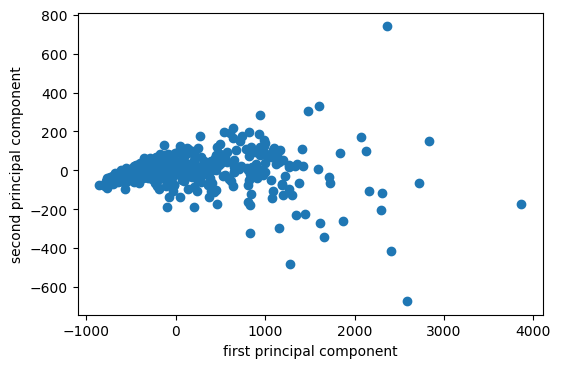

In [23]:
from sklearn.decomposition import PCA
print(cancer.data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cancer.data)
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

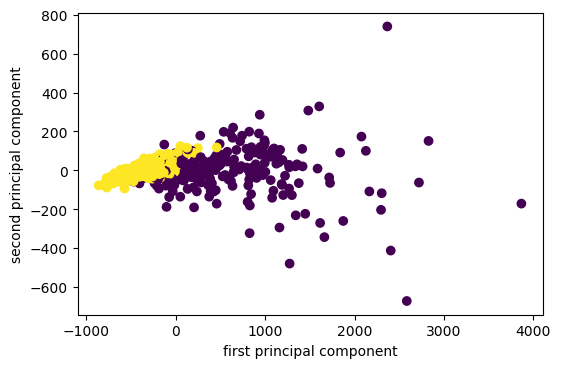

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

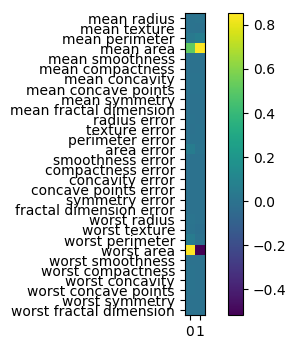

In [68]:
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()

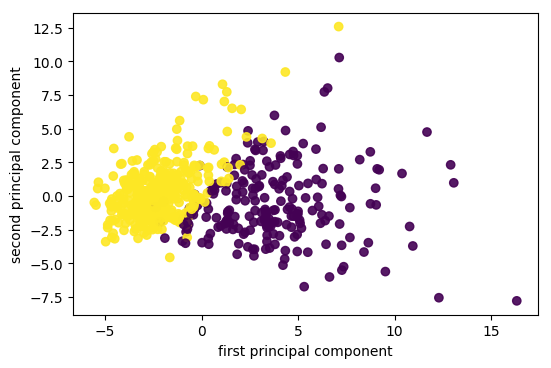

In [60]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(cancer.data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=cancer.target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [61]:
pca.components_

array([[ 0.005,  0.002,  0.035,  0.517,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   ,  0.   , -0.   ,  0.002,  0.056, -0.   ,  0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.007,  0.003,  0.049,  0.852,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.009, -0.003,  0.063,  0.852, -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   , -0.   ,  0.   ,  0.001,  0.008,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   , -0.001, -0.013, -0.   , -0.52 ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ]])

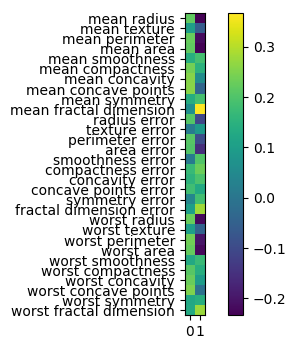

In [71]:
components = pca_scaled.named_steps['pca'].components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()

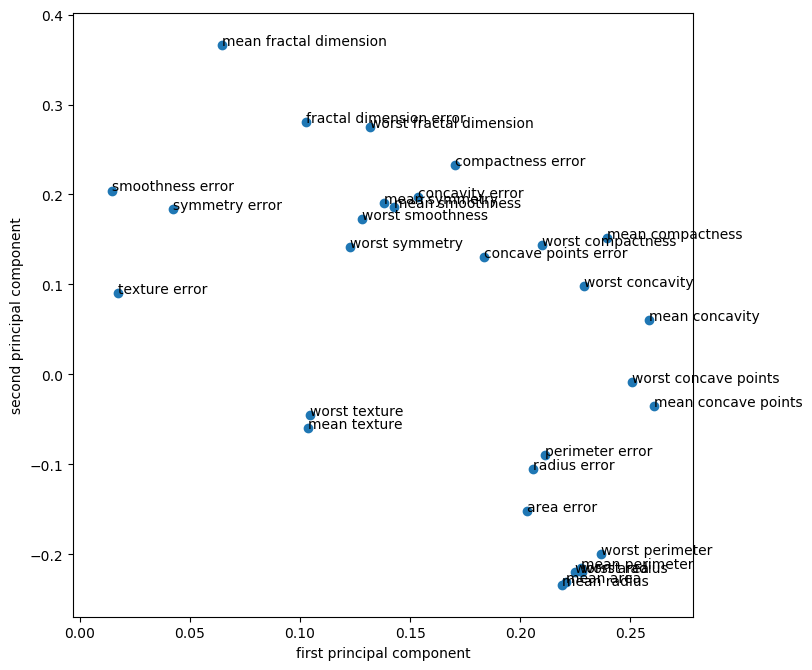

In [74]:
plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(cancer.feature_names[i], feature_contribution)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [113]:
lr = LogisticRegression(C=10000).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.992957746479
0.944055944056


In [123]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.960093896714
0.923076923077


In [115]:
X_train.shape

(426, 30)

In [116]:
pca.explained_variance_ratio_.shape

(30,)

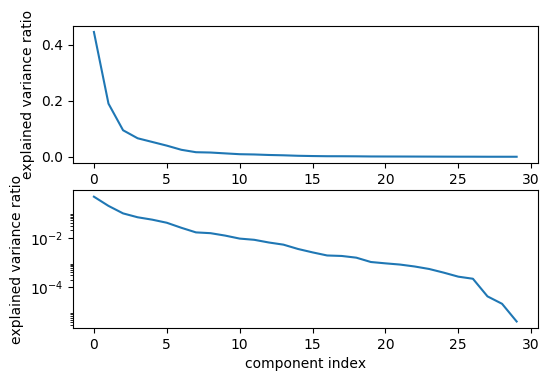

In [117]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_train, y_train)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

In [155]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.981220657277
0.958041958042


In [156]:
pca = pca_lr.named_steps['pca']
lr = pca_lr.named_steps['logisticregression']

In [157]:
coef_pca = pca.inverse_transform(lr.coef_)

In [177]:
scaled_lr = make_pipeline(StandardScaler(), LogisticRegression(C=1))
scaled_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [178]:
coef_no_pca = scaled_lr.named_steps['logisticregression'].coef_

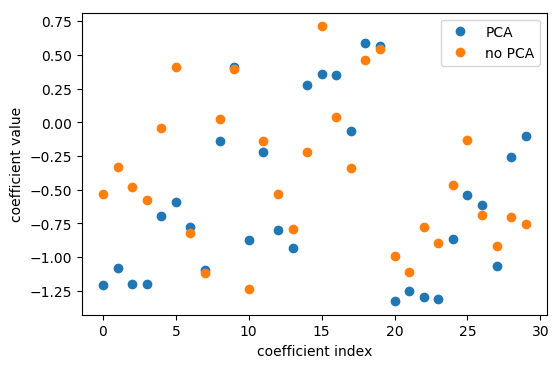

In [180]:
plt.plot(coef_pca.ravel(), 'o', label="PCA")
plt.plot(coef_no_pca.ravel(), 'o', label="no PCA")
plt.legend()
plt.xlabel("coefficient index")
plt.ylabel("coefficient value")

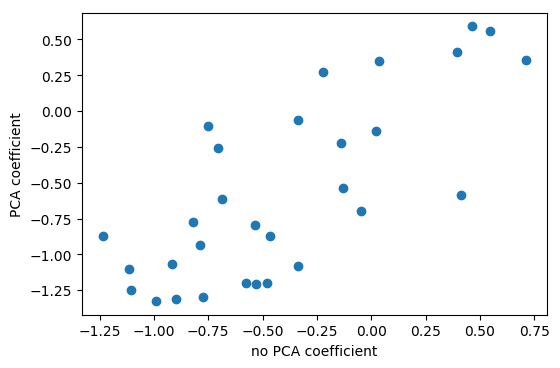

In [181]:
plt.plot(coef_no_pca.ravel(), coef_pca.ravel(), 'o')
plt.xlabel("no PCA coefficient")
plt.ylabel("PCA coefficient")

In [285]:
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 3))
y = X[:, 0] > 0
X *= np.array((1, 15, 20))
X = np.dot(X, rng.normal(size=(3, 3)))

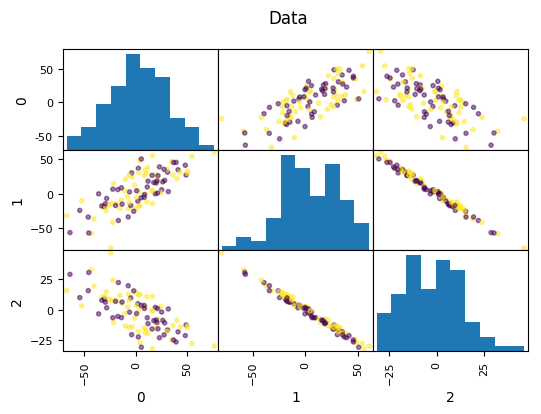

In [289]:
pd.scatter_matrix(pd.DataFrame(X), c=y)
plt.suptitle("Data")

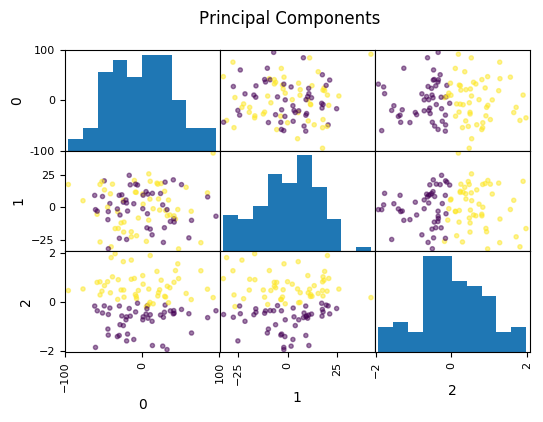

In [291]:
X_pca = PCA().fit_transform(X)
pd.scatter_matrix(pd.DataFrame(X_pca), c=y)
plt.suptitle("Principal Components")

In [ ]:
from sklearn.datasets import 

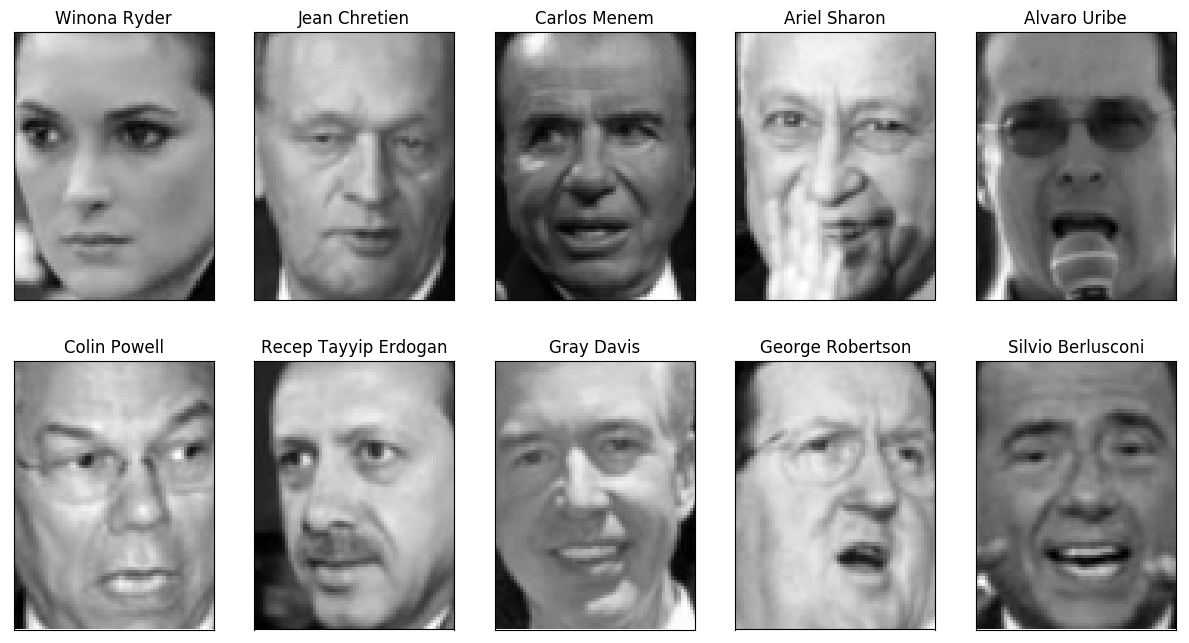

In [185]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [187]:
# have at most 50 images per preson - otherwise too much bush
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [188]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


In [189]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [190]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


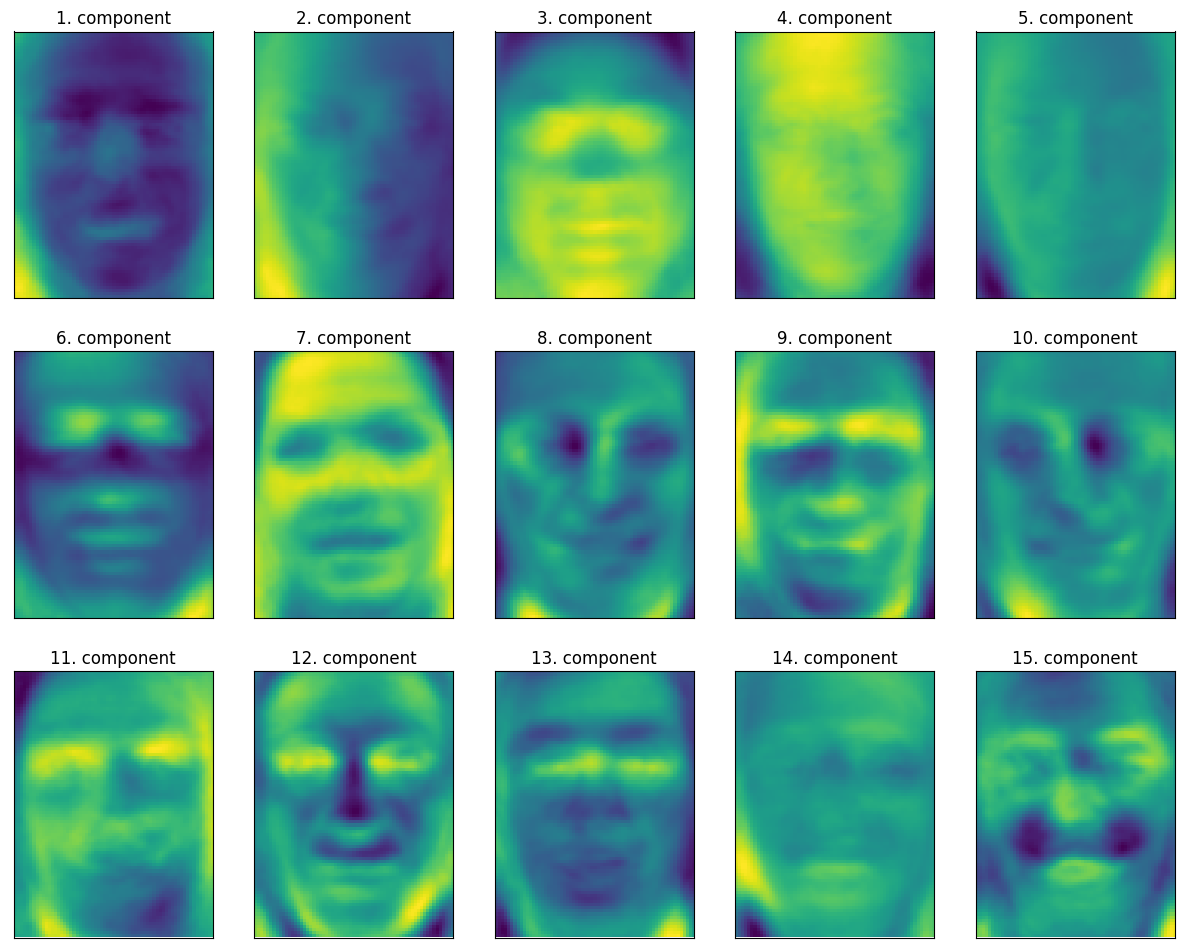

In [192]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [204]:
pca = PCA(n_components=100).fit(X_train)

In [211]:
reconstruction_errors = np.sum((X_test - pca.inverse_transform(pca.transform(X_test))) ** 2, axis=1)

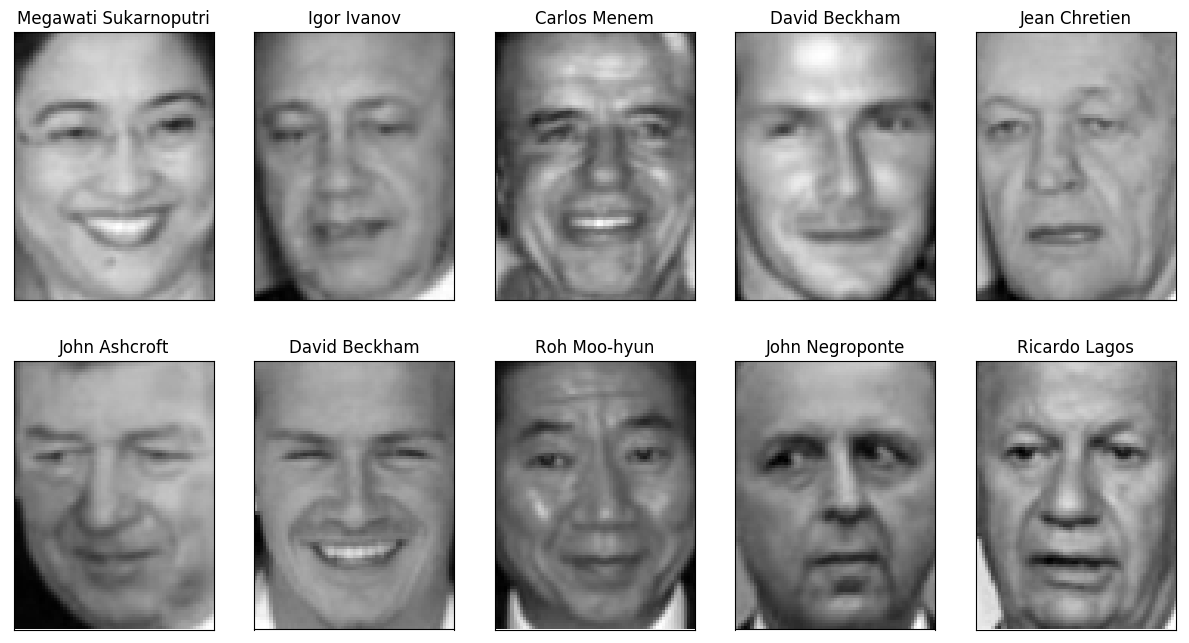

In [218]:
inds = np.argsort(reconstruction_errors)
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_test[inds], X_test[inds], axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.set_title(people.target_names[target])

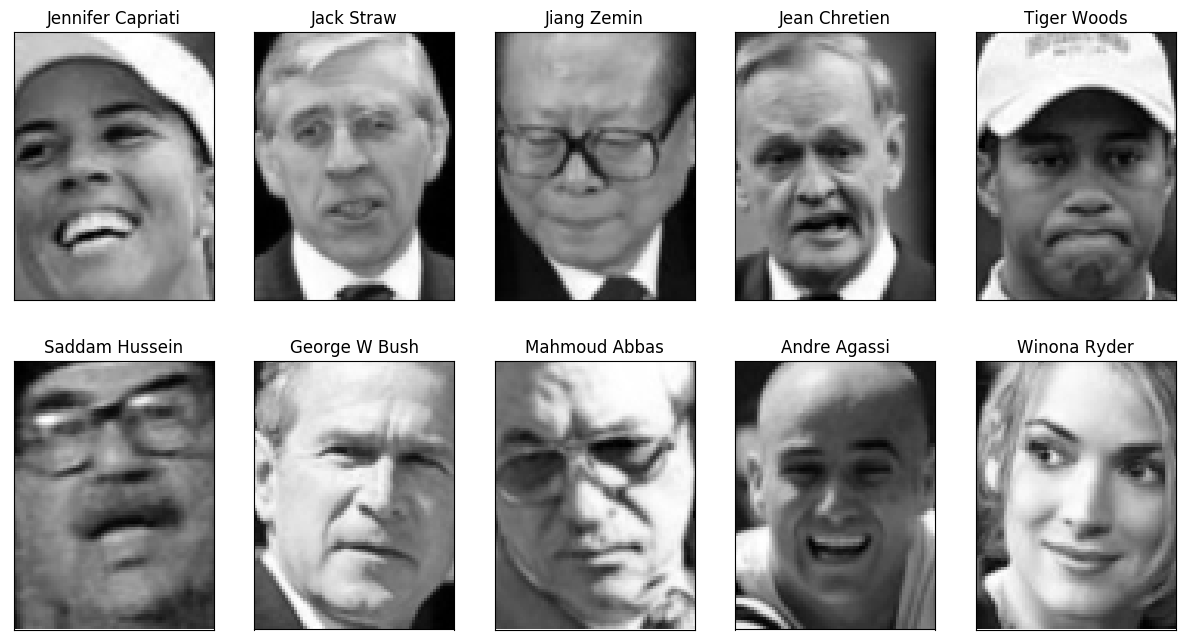

In [219]:
inds = np.argsort(reconstruction_errors)[::-1]
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_test[inds], X_test[inds], axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.set_title(people.target_names[target])

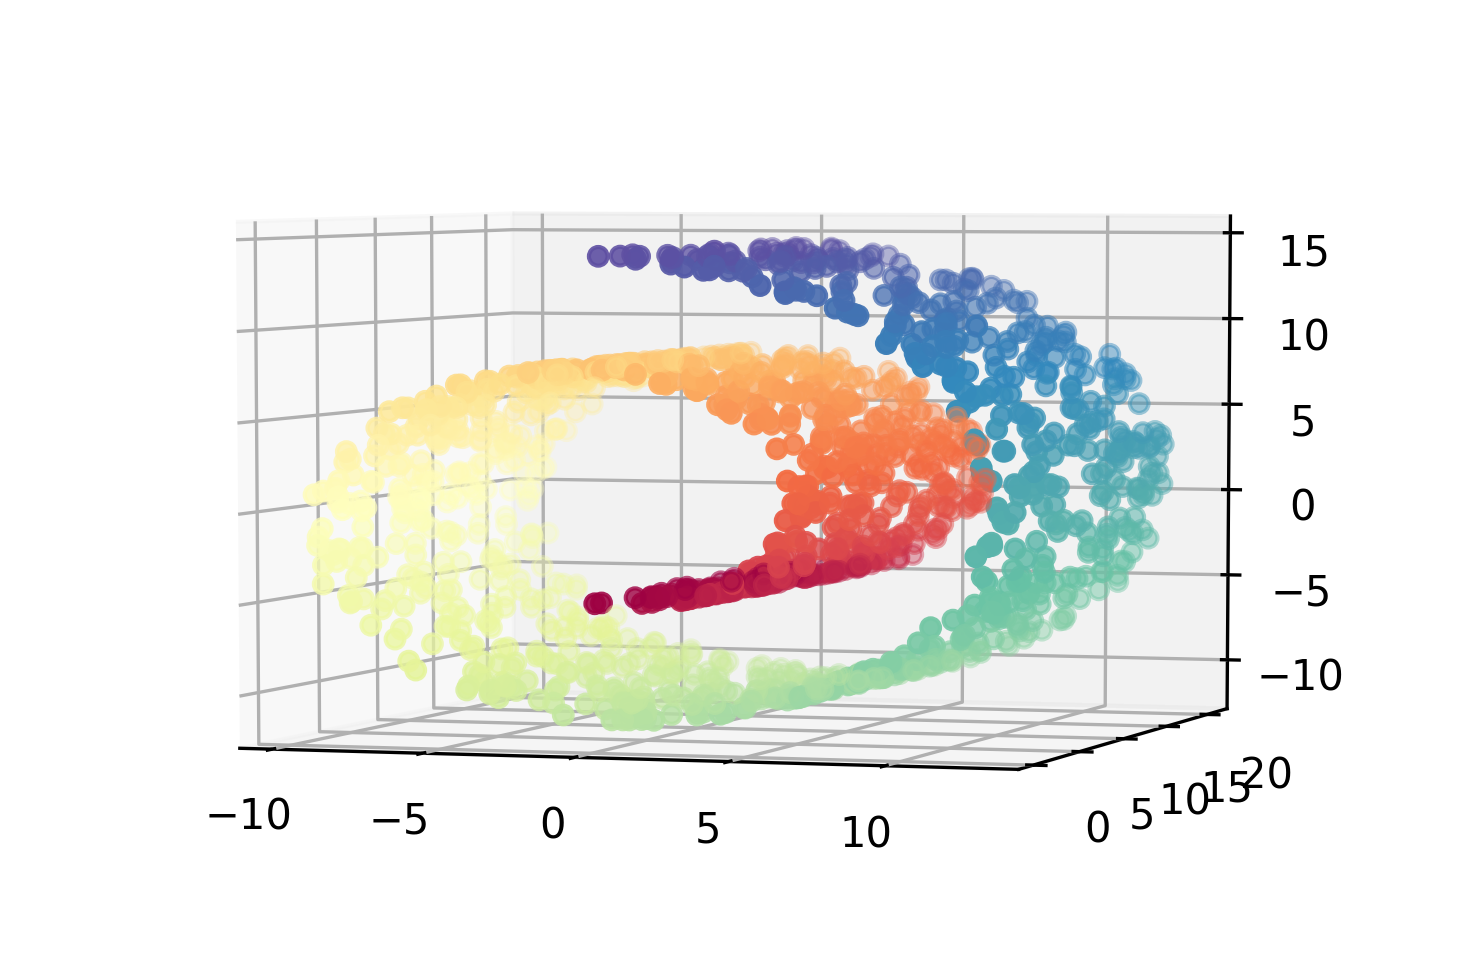

In [228]:
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


In [229]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data / 16.

In [230]:
X_tsne = TSNE().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

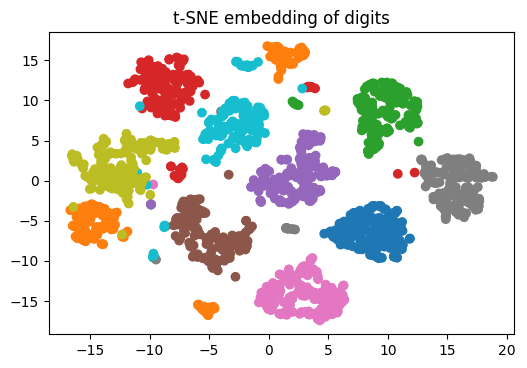

In [233]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(digits.target))
plt.title("t-SNE embedding of digits")

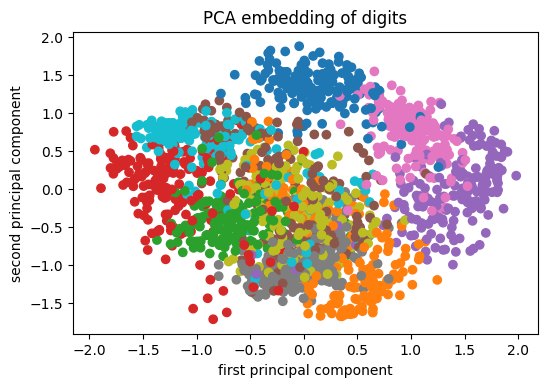

In [236]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(digits.target))
plt.title("PCA embedding of digits")
plt.xlabel("first principal component")
plt.ylabel("second principal component")

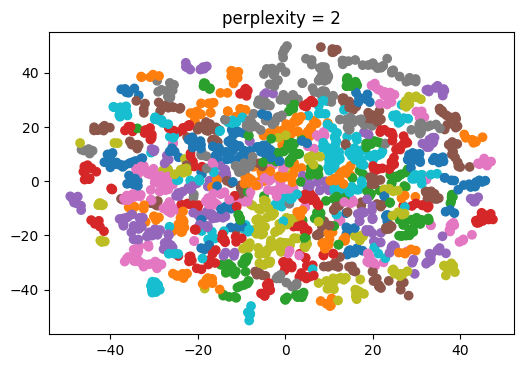

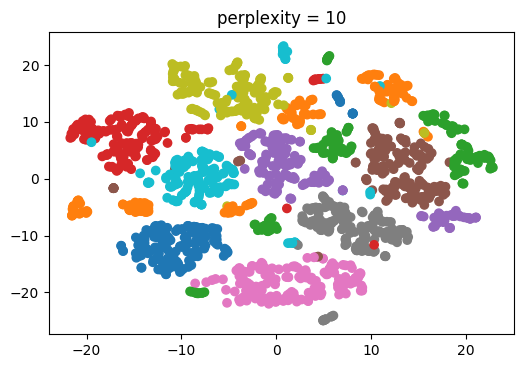

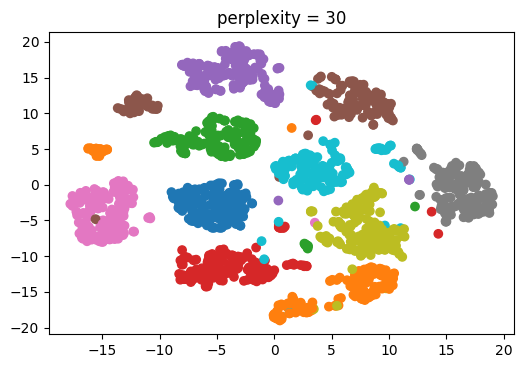

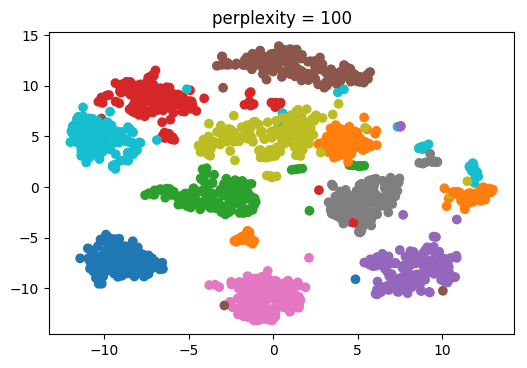

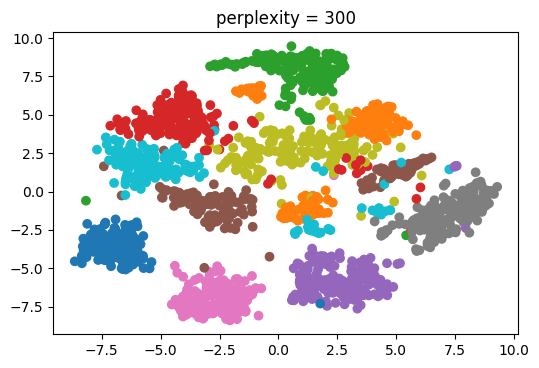

In [240]:
for perplexity in [2, 10, 30, 100, 300]:
    plt.figure()
    X_tsne = TSNE(perplexity=perplexity).fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(digits.target))
    plt.title("perplexity = {}".format(perplexity))

Computing t-SNE embedding


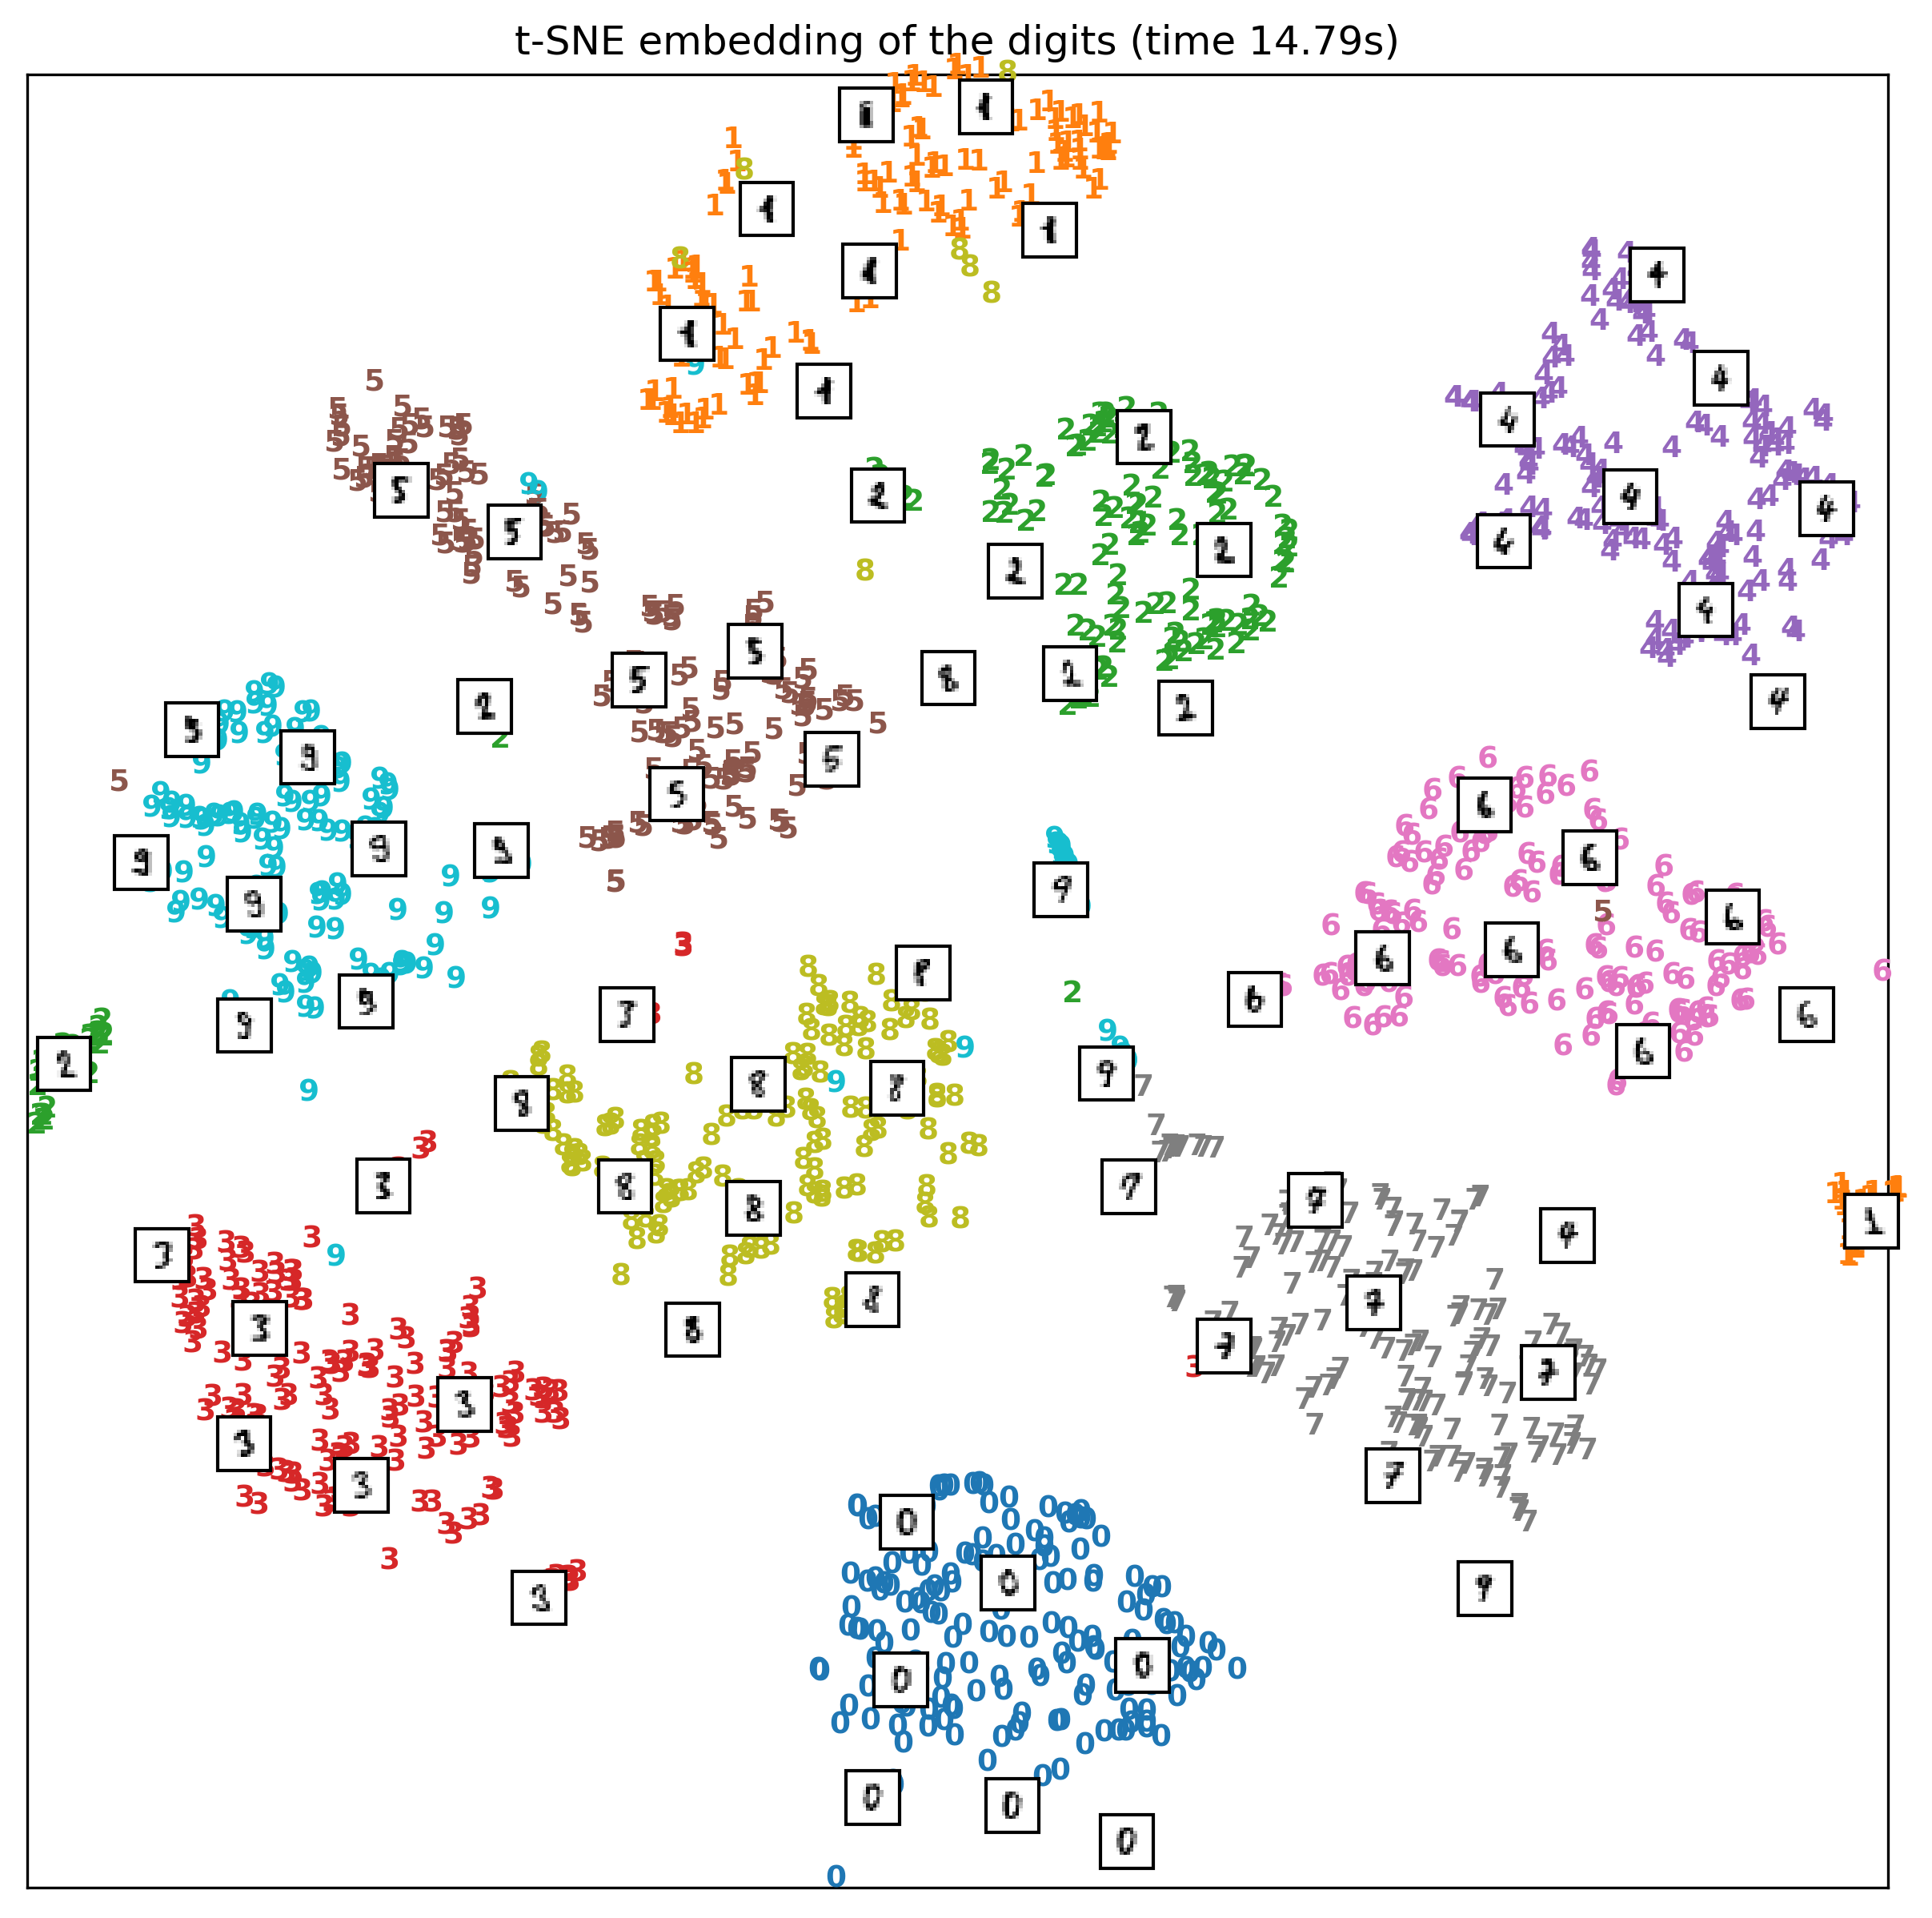

In [244]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(dpi=300, figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Vega10(y[i]),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

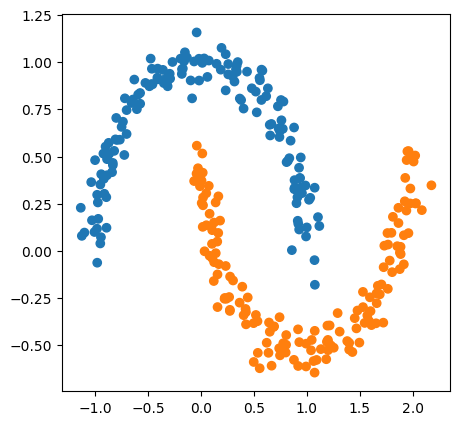

In [271]:
from sklearn.datasets import make_moons
plt.figure(figsize=(5, 5))
X, y = make_moons(n_samples=300, noise=.07, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))

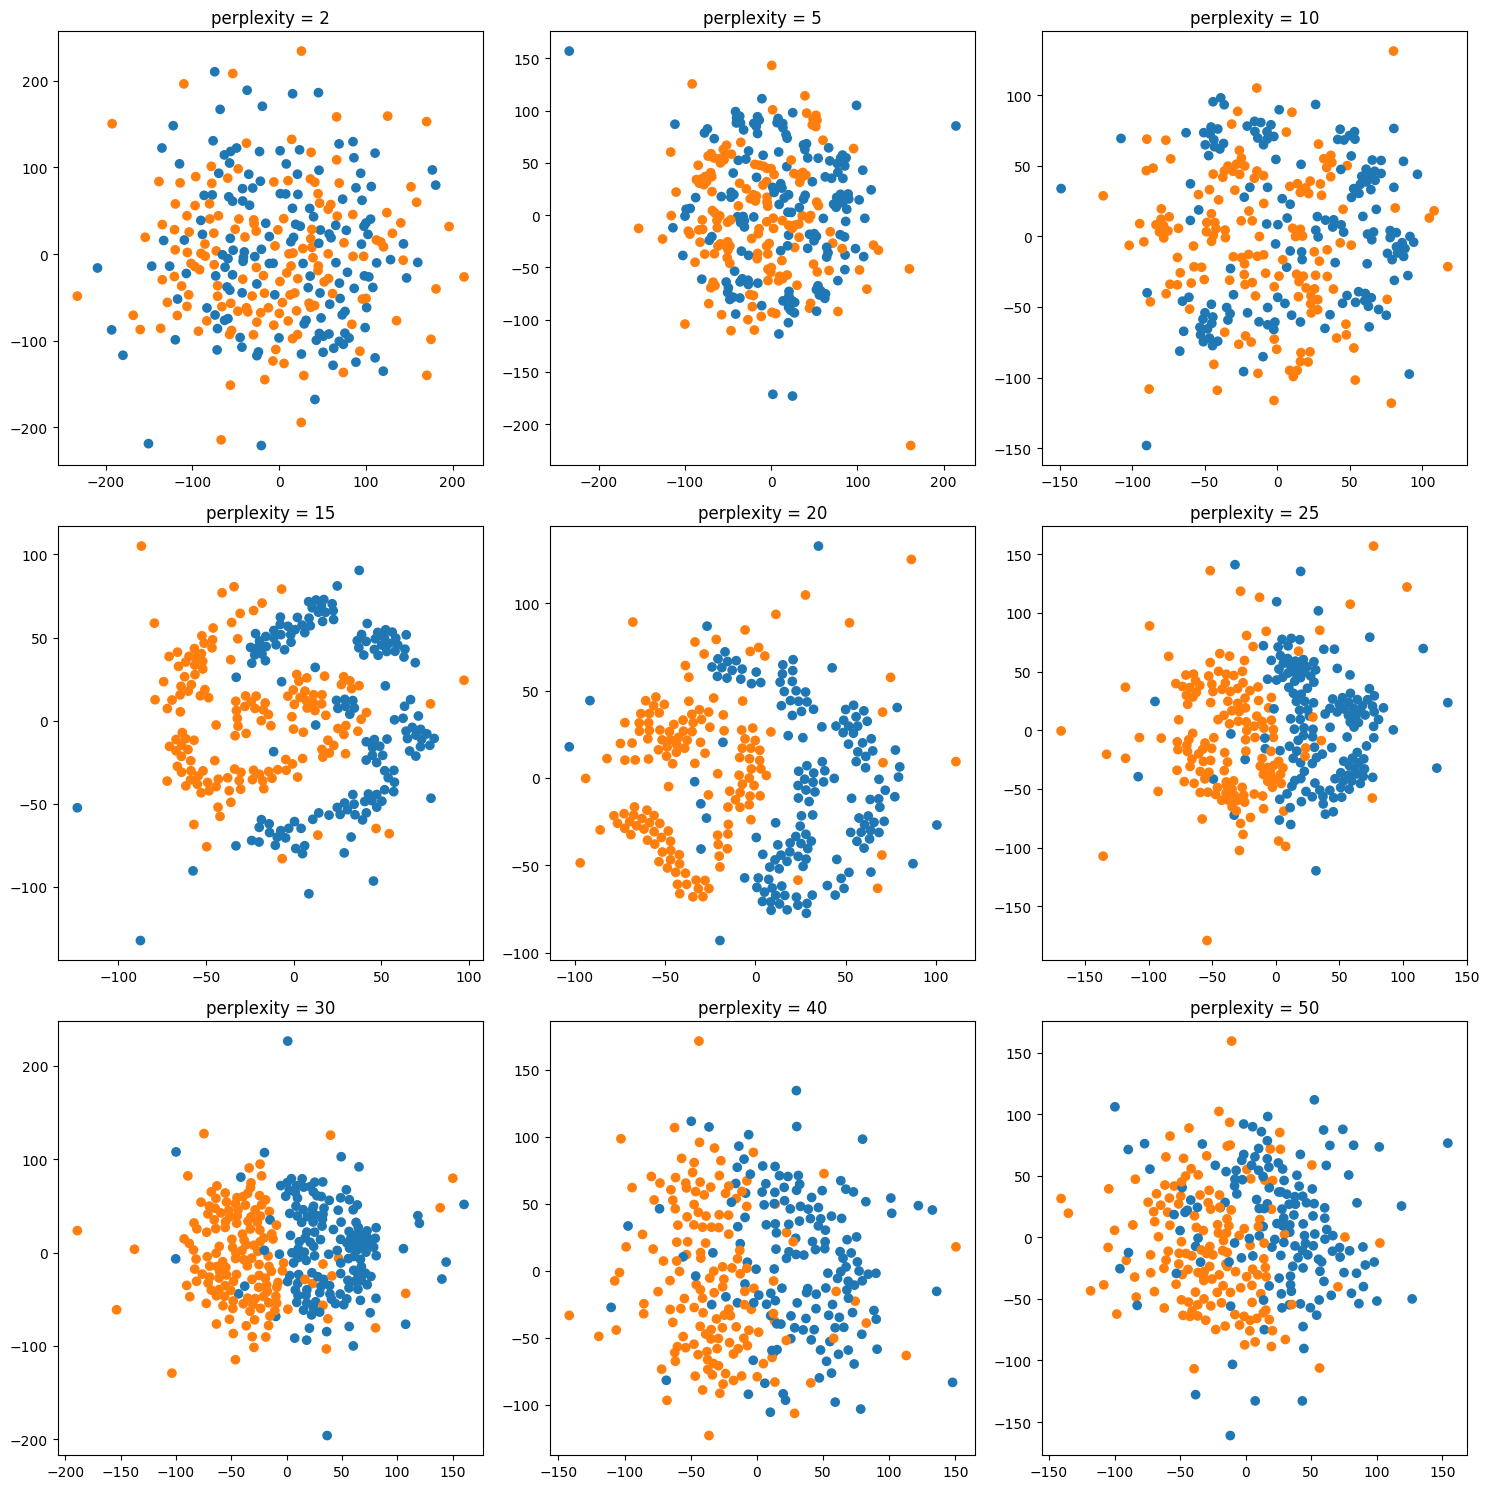

In [269]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for ax, perplexity in zip(axes.ravel(), [2, 5, 10, 15, 20, 25, 30, 40, 50]):
    X_tsne = TSNE(perplexity=perplexity, random_state=0).fit_transform(X)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(y))
    ax.set_title("perplexity = {}".format(perplexity))
fig.tight_layout()

# Discriminant Analysis

In [ ]:
from sklearn.linear_models import LDA